In [11]:
import numpy as np
import cv2 as cv
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
%matplotlib inline

Q1

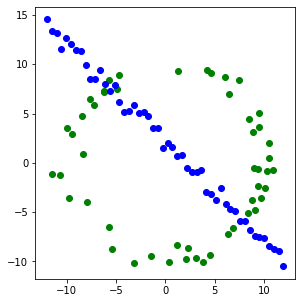

In [30]:
N = 100
half_n = N// 2
r = 10
s = r /16
t = np.random.uniform(0, 2*np.pi, half_n )

n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t),(r+n)*np.sin(t)

X_circ = np.hstack((x.reshape(half_n,1), y.reshape(half_n, 1)))

m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n,1) , y.reshape(half_n,1)))

X = np.vstack((X_circ , X_line))

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.plot(X[:50,0],X[:50,1],'o',color='green')
ax.plot(X[50:,0],X[50:,1],'o',color='blue')
ax.set_aspect('equal')

plt.show()

In [27]:
len(X_circ)

50

In [14]:
total_points = len(x)
p = 0.99
s = 3
e = 0.5
N = int(np.ceil(np.log(1-p)/np.log(1-((1-e)**s))))

Q2

In [19]:
corners = []
def click_left_button(event, x, y, flags, params):
    if event == cv.EVENT_LBUTTONDOWN:
        corners.append([x,y])
    

img = cv.imread(r"C:\Users\thilanka bandara\Downloads\images\001.jpg")
cv.imshow('image', img)
cv.setMouseCallback('image', click_left_button)
cv.waitKey(0)
cv.destroyAllWindows()